In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import os

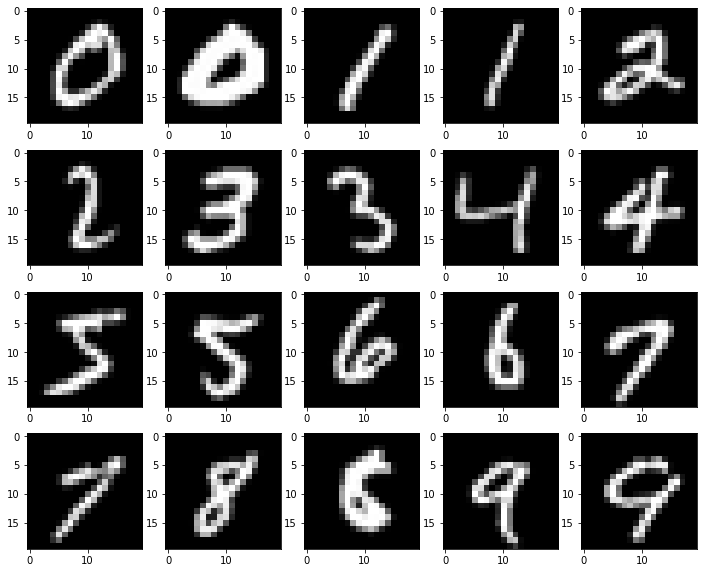

In [2]:
def read_digits(directory):
    files = sorted(os.listdir(directory))
    digit_images = []
    labels = []
    for file in files:
        img = plt.imread(directory+'/'+file)
        digit_images.append(img)
        label = int(file.split('.')[0].split('_')[1])
        labels.append(label)
    
    return digit_images, labels

digits_per_class = 250
train_imgs, train_labels = read_digits('digits/train')
test_imgs, test_labels = read_digits('digits/test')
    
# Mostra 2 dígitos de cada classe
k = 0
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_imgs[k], 'gray')
    k += digits_per_class//2

In [3]:
def pixel(img, center, x, y):
    new_value = 0

    #verifica se o pixel está na borda, antes de calcular o valor para evitar erros
    if x < 0 or y < 0 or x >= img.shape[0] or y >= img.shape[1]:
        return new_value
    if img[x][y] >= center:
        new_value = 1
    return new_value

def lbp_pixel(img, x, y):
    center = img[x][y]

    #calcula cada pixel de adjacente, resultando em uma lista que representa um valor binário
    val_aux = []
    val_aux.append(pixel(img, center, x-1, y-1))
    val_aux.append(pixel(img, center, x-1, y))
    val_aux.append(pixel(img, center, x-1, y+1))
    val_aux.append(pixel(img, center, x, y+1))
    val_aux.append(pixel(img, center, x+1, y+1))
    val_aux.append(pixel(img, center, x+1, y))
    val_aux.append(pixel(img, center, x+1, y-1))
    val_aux.append(pixel(img, center, x, y-1))

    #converte o valor binário em um inteiro entre 0 e 255
    val = 0
    for i in range(len(val_aux)):
        val += val_aux[i] * (2 ** i)
    return val

In [4]:
def lbp_atributes(imgs):
    lbp_data = []

    #tamanho da imagem
    height = 20
    width = 20

    #percorre o dataset
    for img in imgs:
        img_lbp = np.zeros((height, width), np.uint8)
        for i in range(0, height):
            for j in range(0, width):
                #constroi um novo vetor, composto pelo valor entre 0 e 255 que representa cada pixel
                img_lbp[i, j] = lbp_pixel(img, i, j)
        lbp_data.append(np.histogram(img_lbp, bins=256)[0])

    return np.array(lbp_data)

train_data = lbp_atributes(train_imgs)


### Exemplo do histograma criado

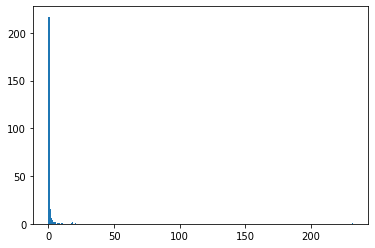

In [5]:
_ = plt.hist(train_data[1000], bins=256)
plt.show()

# Classificação

### KNN

In [6]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(train_data, train_labels)

KNeighborsClassifier(weights='distance')

In [7]:
test_data = lbp_atributes(test_imgs)
result_knn = knn.predict(test_data)

In [8]:
metrics_knn = classification_report(result_knn, test_labels, output_dict= False)
print(metrics_knn)

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       297
           1       0.96      0.97      0.96       246
           2       0.36      0.42      0.39       219
           3       0.71      0.61      0.66       292
           4       0.61      0.74      0.67       206
           5       0.60      0.56      0.58       268
           6       0.50      0.53      0.51       236
           7       0.63      0.78      0.70       203
           8       0.65      0.63      0.64       259
           9       0.62      0.57      0.60       274

    accuracy                           0.64      2500
   macro avg       0.64      0.65      0.64      2500
weighted avg       0.65      0.64      0.65      2500



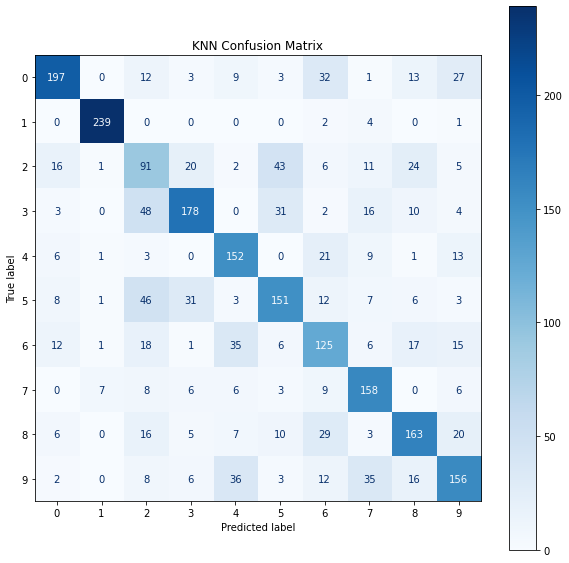

In [9]:
c_matrix_knn = confusion_matrix(result_knn, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix=c_matrix_knn)
f, ax = plt.subplots(figsize=(10,10))
fig.plot(cmap='Blues', values_format='g', ax=ax)
plt.title('KNN Confusion Matrix')
plt.show()

### Multi-Layer Perceptron

In [10]:
clf = MLPClassifier(random_state=42, max_iter=1000).fit(train_data, train_labels)
clf.predict_proba(test_data)
result_mlp = clf.predict(test_data)
clf.score(test_data, test_labels)


0.7976

In [11]:
metrics_mlp = classification_report(result_mlp, test_labels, output_dict=False)
print(metrics_mlp)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       247
           1       0.95      0.95      0.95       251
           2       0.56      0.62      0.59       226
           3       0.84      0.85      0.85       248
           4       0.86      0.85      0.86       255
           5       0.76      0.72      0.74       264
           6       0.76      0.78      0.77       244
           7       0.86      0.82      0.84       261
           8       0.78      0.81      0.79       240
           9       0.79      0.75      0.77       264

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500



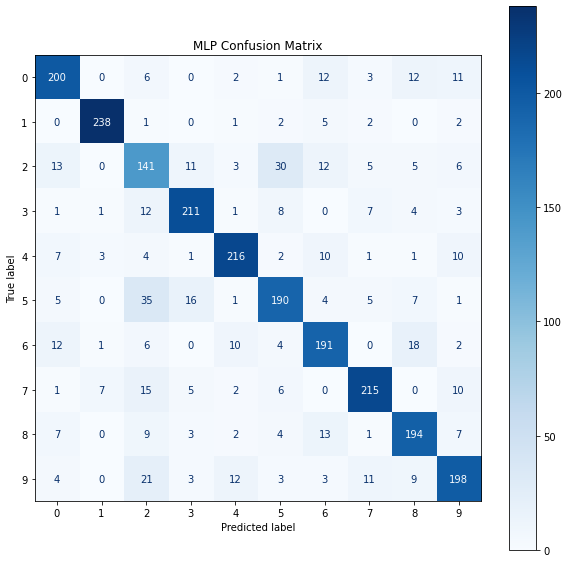

In [12]:
c_matrix_mlp = confusion_matrix(result_mlp, test_labels)
fig = ConfusionMatrixDisplay(confusion_matrix=c_matrix_mlp)
f, ax = plt.subplots(figsize=(10,10))
fig.plot(cmap='Blues', values_format='g', ax=ax)
plt.title('MLP Confusion Matrix')
plt.show()